In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/home/jithendra/Documents/projects/zzz.../graduate_admission_prediction/data/Admission_Predict_Ver1.1.csv")

In [3]:
data = data.drop(['Serial No.'], axis = 1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Problem statement:
Our aim here is to predict the **Chance of admit** value given other attributes!

### Basic exploratory data analysis

In [4]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
##checking if any null values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No missing values in the dataset

In [6]:
##summary statistics of quantitative variables
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


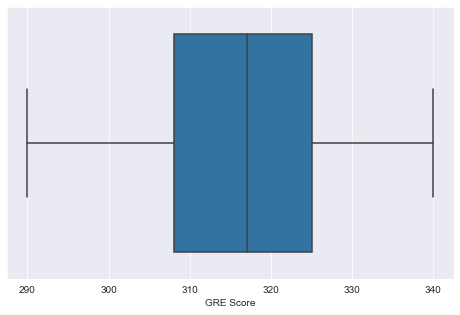

In [7]:
sns.boxplot(x=data['GRE Score'])

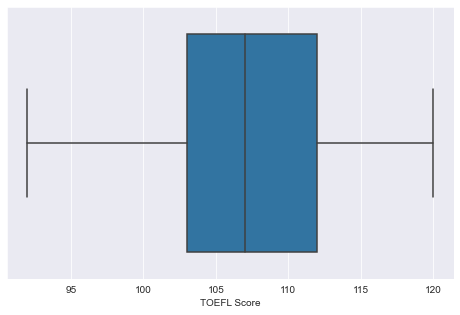

In [8]:
sns.boxplot(x=data['TOEFL Score'])

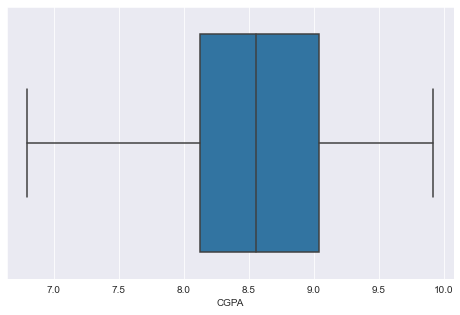

In [9]:
sns.boxplot(x=data['CGPA'])

In [10]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

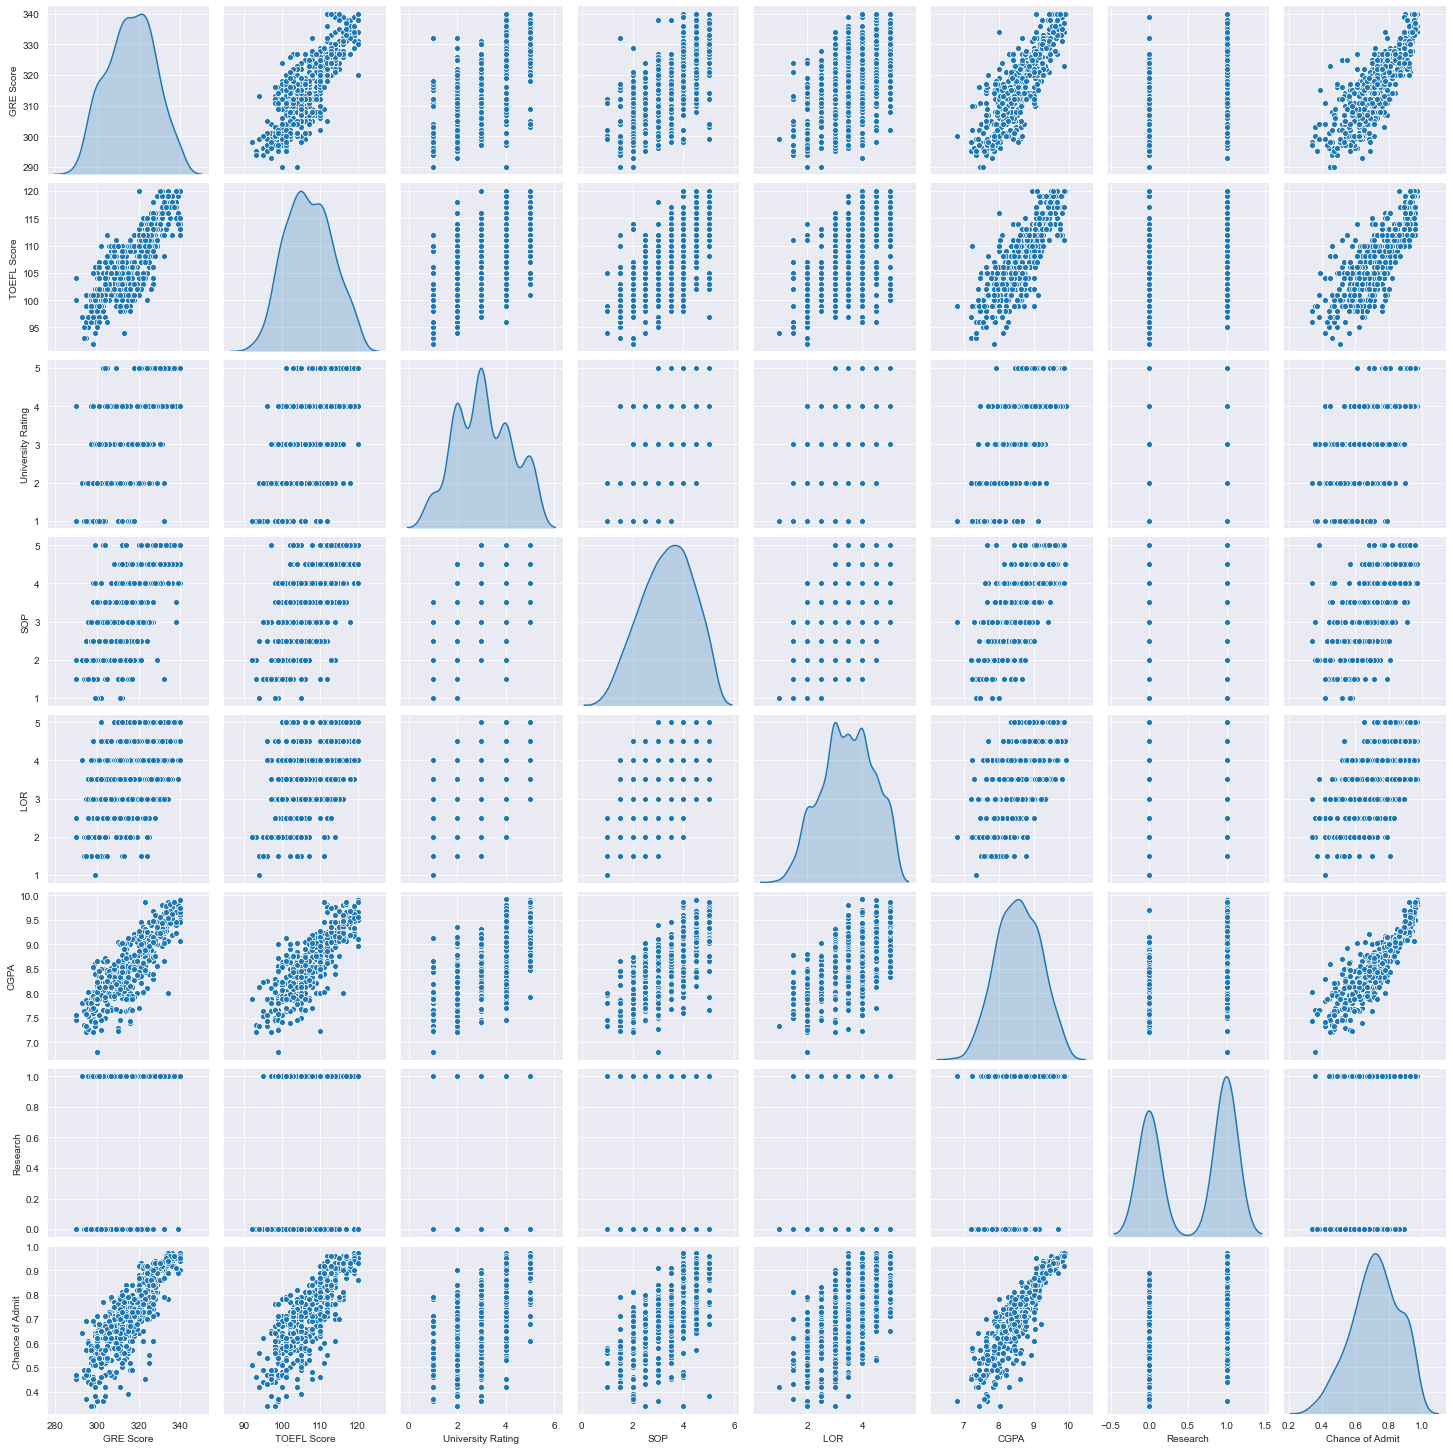

In [11]:
sns.pairplot(data, diag_kind='kde')

### Categorical features

In [12]:
##category distribution
data["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [13]:
data["Research"].value_counts() / len(data)

1    0.56
0    0.44
Name: Research, dtype: float64

In [14]:
data["University Rating"].value_counts()/ len(data)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

In [15]:
data["SOP"].value_counts()/len(data)

4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64

In [16]:
data["LOR "].value_counts()/len(data)

3.0    0.198
4.0    0.188
3.5    0.172
4.5    0.126
5.0    0.100
2.5    0.100
2.0    0.092
1.5    0.022
1.0    0.002
Name: LOR , dtype: float64